In [1]:
%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
import numpy as np
import torch
from torch.utils.data import DataLoader
from scripts.dataset import HairTypeDataset, create_dataset_summary, print_detailed_summary
from scripts.model import HairTypeClassifier, train_model, plot_training_history
from torchvision import transforms
from torchsummary import summary

SEED = 42
np.random.seed(SEED)
torch.manual_seed(SEED)

if torch.cuda.is_available():
    torch.cuda.manual_seed(SEED)
    torch.cuda.manual_seed_all(SEED)

torch.backends.cudnn.deterministic = True
torch.backends.cudnn.benchmark = False

The dataset has been previously downloaded to the `data/` folder as per the guideline from the homework sheet.  

In [2]:
# Training parameters
training_config = {
    "input_size": (3, 200, 200),
    "batch_size": 20,
    "optimizer": {
        "type": "SGD",
        "lr": 0.002,
        "momentum": 0.8
    },
    "criterion": "BCEWithLogitsLoss"
}

In [3]:
training_config["optimizer"]['momentum']

0.8

In [4]:
# Create Data Transformations (Taken from ImageNet)
transformator = transforms.Compose([
    transforms.Resize(training_config["input_size"][1:]),
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    ) 
])

In [5]:
train_dataset = HairTypeDataset(
    "../data/dataset_hw8/train",
    transform=transformator
)
val_dataset = HairTypeDataset(
    "../data/dataset_hw8/test",
    transform=transformator
)

In [6]:
# summary = []

# for dataset in [train_dataset, test_dataset]:
#     info = create_dataset_summary(dataset)

#     print_detailed_summary(info)
#     print("\n\n")
#     summary.append(info)

info_train = create_dataset_summary(train_dataset)
print_detailed_summary(info_train)

HAIR TYPE DATASET SUMMARY

📊 BASIC INFORMATION
----------------------------------------
• Dataset Size: 800 samples
• Number of Classes: 2
• Data Directory: ../data/dataset_hw8/train
• Image Transforms: Yes
• Label Transforms: No

🏷️  CLASS INFORMATION
----------------------------------------
Class Distribution:
  curly          :  410 samples ( 51.2%)
  straight       :  390 samples ( 48.8%)

📈 STATISTICS
----------------------------------------
• Average samples per class: 400.0
• Min samples per class: 390
• Max samples per class: 410
• Most common class: curly
• Least common class: straight

🖼️  SAMPLE PREVIEW
----------------------------------------
curly:
  Total: 410 samples
  Preview (3 samples):
    1. 00cbad1ffe22d900018e5a2e7376daed4.jpg
    2. 0160dfee18352aa9bf5c6e617de9e07b4.jpg
    3. 0fd85bcde626a95e20489c83f292d8204.jpg

straight:
  Total: 390 samples
  Preview (3 samples):
    1. 000028d73-Nicole_Scherzinger.jpg
    2. 03e7316208c63582103294f3e1ef8b7b.jpg
    3. 051c0

In [7]:
info_val = create_dataset_summary(val_dataset)
print_detailed_summary(info_val)

HAIR TYPE DATASET SUMMARY

📊 BASIC INFORMATION
----------------------------------------
• Dataset Size: 201 samples
• Number of Classes: 2
• Data Directory: ../data/dataset_hw8/test
• Image Transforms: Yes
• Label Transforms: No

🏷️  CLASS INFORMATION
----------------------------------------
Class Distribution:
  curly          :  103 samples ( 51.2%)
  straight       :   98 samples ( 48.8%)

📈 STATISTICS
----------------------------------------
• Average samples per class: 100.5
• Min samples per class: 98
• Max samples per class: 103
• Most common class: curly
• Least common class: straight

🖼️  SAMPLE PREVIEW
----------------------------------------
curly:
  Total: 103 samples
  Preview (3 samples):
    1. 03312ac556a7d003f7570657f80392c34.jpg
    2. 106dfcf4abe76990b585b2fc2e3c9f884.jpg
    3. 1a9dbe23a0d95f1c292625960e4509184.jpg

straight:
  Total: 98 samples
  Preview (3 samples):
    1. 01b8ef4743e2a5d1b3e888ef18acdfd0.jpg
    2. 0a1c060ba84f25dd6f353656818fb646.jpg
    3. 1173

In [8]:
train_loader = DataLoader(train_dataset, batch_size=training_config["batch_size"], shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=training_config["batch_size"], shuffle=False)

In [9]:
device = torch.device("cuda")
model = HairTypeClassifier()
model.to(device)
optimizer = torch.optim.SGD(model.parameters(), lr=training_config["optimizer"]["lr"], momentum=training_config["optimizer"]['momentum'])
criterion = torch.nn.BCEWithLogitsLoss()

In [10]:
# Train with enhanced function
history, best_accuracy = train_model(
    train_loader=train_loader,
    val_loader=val_loader,
    device=device,
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    num_train=len(train_dataset),
    num_val=len(val_dataset),
    num_epochs=10,
)


Epoch  |  Train Loss  | Train Acc  |   Val Loss   |  Val Acc   |     LR    


Epoch 1:   0%|          | 0/40 [00:00<?, ?it/s]

  1    |    0.6570    |   0.6500   |    0.6055    |   0.6617   |  0.002000 


Epoch 2:   0%|          | 0/40 [00:00<?, ?it/s]

  2    |    0.5662    |   0.6825   |    0.5927    |   0.6716   |  0.002000 


Epoch 3:   0%|          | 0/40 [00:00<?, ?it/s]

  3    |    0.5090    |   0.7212   |    0.5922    |   0.6617   |  0.002000 


Epoch 4:   0%|          | 0/40 [00:00<?, ?it/s]

  4    |    0.4578    |   0.7812   |    0.6126    |   0.6816   |  0.002000 


Epoch 5:   0%|          | 0/40 [00:00<?, ?it/s]

  5    |    0.4021    |   0.8025   |    0.6348    |   0.6866   |  0.002000 


Epoch 6:   0%|          | 0/40 [00:00<?, ?it/s]

  6    |    0.3503    |   0.8625   |    0.6590    |   0.6965   |  0.002000 


Epoch 7:   0%|          | 0/40 [00:00<?, ?it/s]

  7    |    0.3117    |   0.8550   |    0.9003    |   0.6667   |  0.002000 


Epoch 8:   0%|          | 0/40 [00:00<?, ?it/s]

  8    |    0.2325    |   0.9038   |    0.7461    |   0.7164   |  0.002000 


Epoch 9:   0%|          | 0/40 [00:00<?, ?it/s]

  9    |    0.1487    |   0.9513   |    0.7598    |   0.7214   |  0.002000 


Epoch 10:   0%|          | 0/40 [00:00<?, ?it/s]

  10   |    0.1829    |   0.9313   |    0.7534    |   0.7164   |  0.002000 


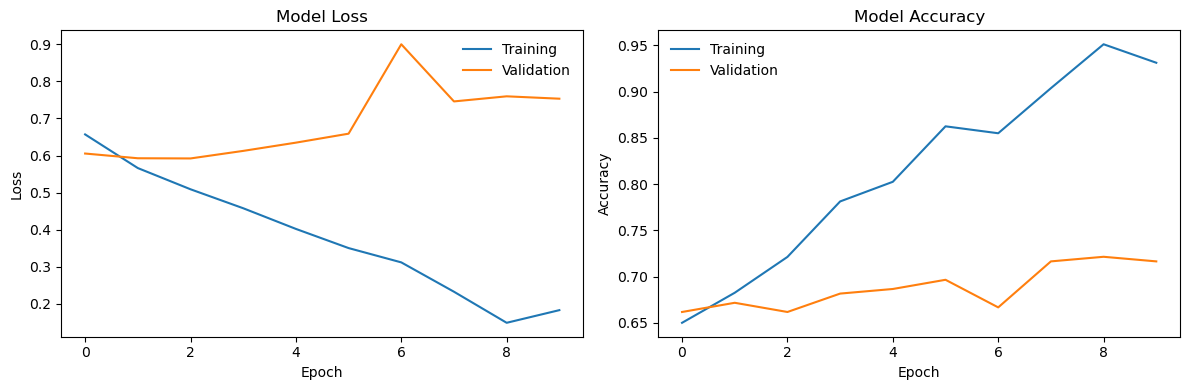

In [11]:
fig = plot_training_history(history)

#### Question 1: Which loss function?

In [12]:
print("For binary classification tasks we chose: BCEWithLogitsLoss")

For binary classification tasks we chose: BCEWithLogitsLoss


#### Question 2: Total Number of Neurons

In [13]:
summary(model, input_size=training_config["input_size"])

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1         [-1, 32, 198, 198]             896
              ReLU-2         [-1, 32, 198, 198]               0
         MaxPool2d-3           [-1, 32, 99, 99]               0
            Linear-4                   [-1, 64]      20,072,512
              ReLU-5                   [-1, 64]               0
            Linear-6                    [-1, 1]              65
Total params: 20,073,473
Trainable params: 20,073,473
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.46
Forward/backward pass size (MB): 21.54
Params size (MB): 76.57
Estimated Total Size (MB): 98.57
----------------------------------------------------------------


#### Question 3: What is the median of the training accuracy?

In [14]:
print(f"The median training accuracy across all epochs: {np.median(history["train_acc"])}")

The median training accuracy across all epochs: 0.82875


#### Question 4: What is the standard deviation of the training accuracy?

In [15]:
print(f"The median training loss across all epochs: {np.std(history["train_loss"])}")

The median training loss across all epochs: 0.15944600417341154


In [16]:
train_aug_transforms = transforms.Compose([
    transforms.RandomRotation(50),  # Random rotation up to 50 degrees
    transforms.RandomResizedCrop(200, scale=(0.9, 1.0), ratio=(0.9, 1.1)),  # Random crop and resize
    transforms.RandomHorizontalFlip(),  # Random horizontal flip
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

# Validation transforms (NO augmentations - only basic preprocessing)
val_transforms = transforms.Compose([
    transforms.Resize((200, 200)),  # Simple resize to match training size
    transforms.ToTensor(),
    transforms.Normalize(
        mean=[0.485, 0.456, 0.406],
        std=[0.229, 0.224, 0.225]
    )
])

In [17]:
# Create datasets with the new transforms
train_dataset = HairTypeDataset(
    data_dir='../data/dataset_hw8/train',
    transform=train_aug_transforms  # Uses augmentations
)

val_dataset = HairTypeDataset(
    data_dir='../data/dataset_hw8/test',
    transform=val_transforms  # No augmentations
)

train_loader = DataLoader(train_dataset, batch_size=training_config["batch_size"], shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=training_config["batch_size"], shuffle=False)

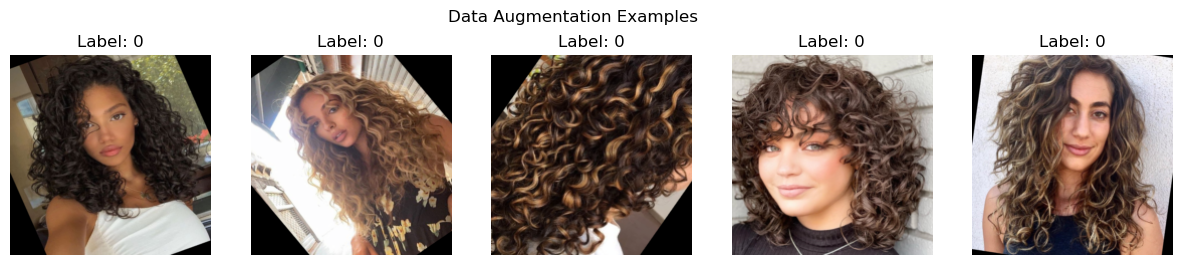

In [18]:
def visualize_augmentations(dataset, num_samples=5):
    
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 3))
    
    for i in range(num_samples):
        image, label = dataset[i]
        # Convert tensor back to image for display
        image = image.permute(1, 2, 0).numpy()
        image = image * [0.229, 0.224, 0.225] + [0.485, 0.456, 0.406]  # Unnormalize
        image = np.clip(image, 0, 1)
        
        axes[i].imshow(image)
        axes[i].set_title(f'Label: {label}')
        axes[i].axis('off')
    
    plt.suptitle('Data Augmentation Examples')
    plt.show()

# Visualize some augmented training examples
visualize_augmentations(train_dataset, num_samples=5)

In [19]:
# Train with enhanced function
history_aug, best_accuracy_aug = train_model(
    train_loader=train_loader,
    val_loader=val_loader,
    device=device,
    model=model,
    optimizer=optimizer,
    criterion=criterion,
    num_train=len(train_dataset),
    num_val=len(val_dataset),
    num_epochs=10,
)


Epoch  |  Train Loss  | Train Acc  |   Val Loss   |  Val Acc   |     LR    


Epoch 1:   0%|          | 0/40 [00:00<?, ?it/s]

  1    |    0.6568    |   0.6825   |    0.6062    |   0.6816   |  0.002000 


Epoch 2:   0%|          | 0/40 [00:00<?, ?it/s]

  2    |    0.5903    |   0.6837   |    0.7000    |   0.6567   |  0.002000 


Epoch 3:   0%|          | 0/40 [00:00<?, ?it/s]

  3    |    0.5502    |   0.7075   |    0.6567    |   0.6667   |  0.002000 


Epoch 4:   0%|          | 0/40 [00:00<?, ?it/s]

  4    |    0.5221    |   0.7300   |    0.7591    |   0.7065   |  0.002000 


Epoch 5:   0%|          | 0/40 [00:00<?, ?it/s]

  5    |    0.4994    |   0.7200   |    0.6645    |   0.6965   |  0.002000 


Epoch 6:   0%|          | 0/40 [00:00<?, ?it/s]

  6    |    0.5071    |   0.7400   |    0.5800    |   0.7114   |  0.002000 


Epoch 7:   0%|          | 0/40 [00:00<?, ?it/s]

  7    |    0.4881    |   0.7388   |    0.7017    |   0.6617   |  0.002000 


Epoch 8:   0%|          | 0/40 [00:00<?, ?it/s]

  8    |    0.4980    |   0.7650   |    0.6640    |   0.7065   |  0.002000 


Epoch 9:   0%|          | 0/40 [00:00<?, ?it/s]

  9    |    0.4947    |   0.7538   |    0.6220    |   0.7313   |  0.002000 


Epoch 10:   0%|          | 0/40 [00:00<?, ?it/s]

  10   |    0.4819    |   0.7575   |    0.6612    |   0.6766   |  0.002000 


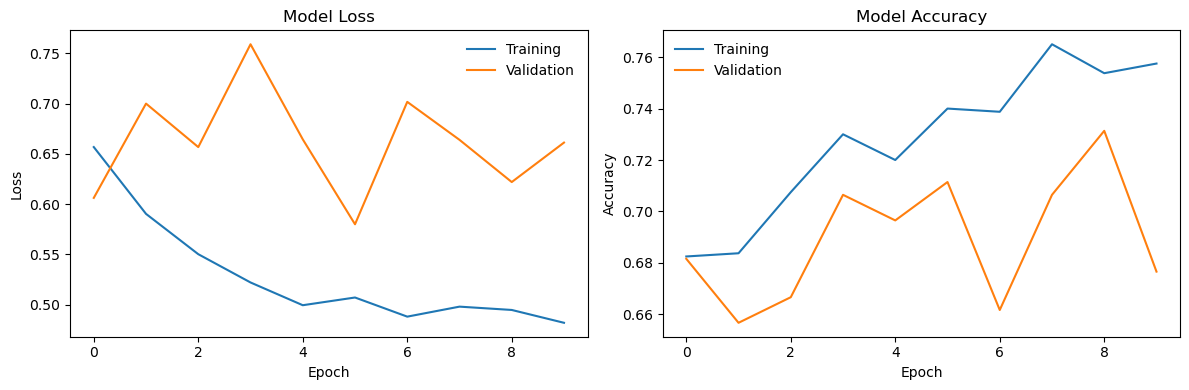

In [20]:
fig_aug = plot_training_history(history_aug)

In [21]:
print(f"The mean test loss = {np.mean(history_aug['val_loss'])}")

The mean test loss = 0.6615364611125667


In [22]:
print(f"The mean test accuracy of the last 5 epochs: {np.mean(history_aug['val_acc'][:5])}")

The mean test accuracy of the last 5 epochs: 0.681592039800995
